In [1]:
import os
os.environ['PROJ_LIB'] = '/home/atorres/miniconda3/pkgs/basemap-1.2.1-py36hd1be537_2/share/basemap/'

import xarray as xr
import numpy as np
import datetime as dt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

Parameters: date and hour (00, 06, 12 or 18). The GFs model has a spatial resolution of 0.25 degrees and a temporal resolution of 1 hour

In [2]:
res = '0p25'
step = '_1hr'
date = dt.date.today().strftime("%Y%m%d")
hour = 0
gfs = f'https://nomads.ncep.noaa.gov:9090/dods/gfs_{res}{step}'
url = f'{gfs}/gfs{date}/gfs_{res}{step}_{hour:02d}z'

Available variables are listed in the previous, URL, accessing any day:

In [3]:
print(f'{url}.info')

https://nomads.ncep.noaa.gov:9090/dods/gfs_0p25_1hr/gfs20200703/gfs_0p25_1hr_00z.info


In [4]:
var = 'tmp2m' # temperature at 2m
lat = (-90, 90)
lon = (0, 360)

Slice variable, lat-lon region and first hour, in this example temperature at 2m at 2020-05-04 00 UTC. Then, transform to numpy arrays

In [5]:
with xr.open_dataset(url) as ds:
    da = ds[var].isel(time = 0).sel(lat = slice(*lat), lon = slice(*lon))
    
    # this downloads data
    lons = da.lon.data
    lats = da.lat.data
    data = da.data
    
    # optionally, export data to NetCDF to be used in another software, for instance Panoply
    #da.to_netcdf(f'{var}_{date}_{hour}.nc')

/home/atorres/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


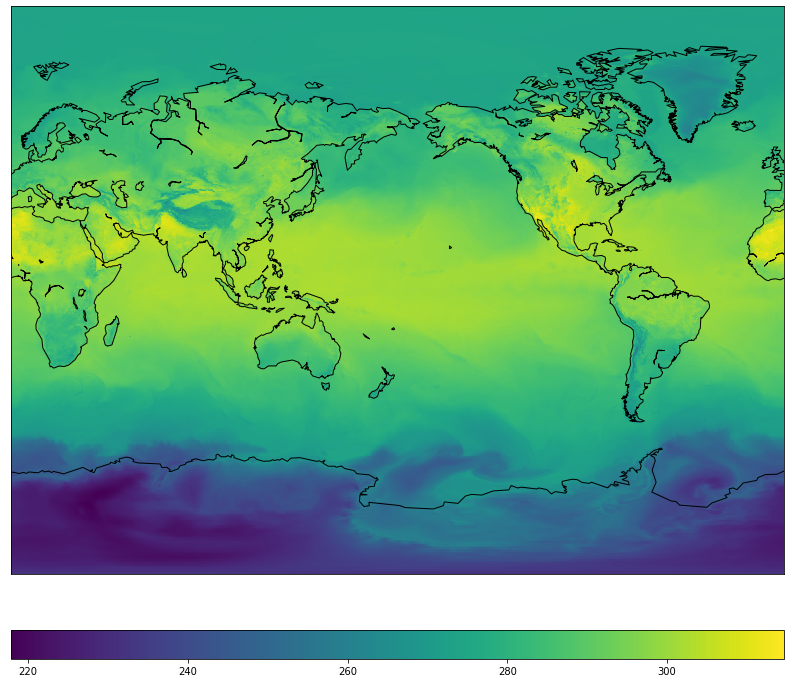

In [6]:
plt.figure(figsize=(20, 12))
m = Basemap(projection='mill', lon_0=180)

# plot coastlines
m.drawcoastlines()

# map lon-lat to map coordinates
lon2d, lat2d = np.meshgrid(lons, lats)
x, y = m(lon2d, lat2d)

# plot color scale
cs = m.pcolor(x, y, np.squeeze(data))
cbar = m.colorbar(cs, location='bottom', pad="10%")

[](http://150.244.222.212:8892/voila/render/get_gfs.ipynb)